# **Análisis de Tarjetas de Crédito: PCA y K-Means**
**By: Diego Araujo**
## Introducción:
En este proyecto, aplicamos **Análisis de Componentes Principales (PCA)** y **Segmentación con K-Means** a una base de datos de clientes con tarjetas de crédito.  
El objetivo es comprender los patrones de uso y segmentar clientes en grupos con características similares, lo que puede ser útil para la gestión del riesgo financiero y la personalización de servicios.

## Objetivos:
1. **Preprocesamiento de datos:** Limpieza y normalización de las variables.
2. **Reducción de dimensionalidad con PCA:** Identificar las variables más relevantes y visualizar la distribución de los datos.
3. **Segmentación con K-Means:** Aplicar el método del codo para determinar el número óptimo de clusters y segmentar clientes en grupos homogéneos.
4. **Interpretación de resultados:** Analizar los segmentos obtenidos y sus características clave.

## Variables :
- **balance:** Saldo promedio en la tarjeta.
- **frecuencia.balance:** Frecuencia de uso del saldo.
- **compras:** Monto total de compras realizadas.
- **deunavez.maxima:** Compra más grande realizada de una sola vez.
- **importe.plazos:** Total de compras realizadas a plazos.
- **adelanto.efectivo:** Adelantos de efectivo retirados.
- **frecuencia.compra:** Frecuencia de compras realizadas.
- **deunavez.frecuentes:** Frecuencia de compras grandes.
- **plazos.frecuentes:** Frecuencia de compras a plazos.
- **efectivo.frecuentes:** Frecuencia de adelantos en efectivo.
- **transacciones.adelanto:** Número de transacciones de adelantos en efectivo.
- **transacciones.compras:** Número de transacciones de compras realizadas.
- **limite.credito:** Límite de crédito asignado.
- **monto.pagado:** Monto total pagado por el cliente.
- **pago.minimo:** Pago mínimo realizado por el cliente.
- **pago.total.prct:** Porcentaje del total pagado respecto a la deuda.
- **tenencia:** Indicador de tenencia de tarjeta.

Este análisis busca extraer información clave sobre los clientes para facilitar la toma de decisiones en estrategias de crédito y segmentación de clientes.

In [1]:
#Importamos las bibliotecas que usaremos
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
#Importar archivos desde drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Cargamos nuestra Data
ruta_csv = "/content/drive/MyDrive/Codigos Python colab/tarjetacredito (1).csv"
df = pd.read_csv(ruta_csv,sep=';', index_col='ID')
df.head()

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,transacciones.adelanto,transacciones.compras,limite.credito,monto.pagado,pago.minimo,pago.total.prct,tenencia
ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe()

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,transacciones.adelanto,transacciones.compras,limite.credito,monto.pagado,pago.minimo,pago.total.prct,tenencia
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.947277,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.922543,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Aplicación de PCA: Reducción de Dimensionalidad

## ¿Por qué usamos PCA?
En este proyecto, contamos con múltiples variables financieras relacionadas con el uso de tarjetas de crédito. Muchas de estas variables pueden estar correlacionadas entre sí, lo que genera redundancia y dificulta la visualización e interpretación de los datos.  
Para abordar este problema, aplicamos **Análisis de Componentes Principales (PCA)**, que nos permite:

1. **Reducir la dimensionalidad** del conjunto de datos sin perder demasiada información.
2. **Identificar patrones** subyacentes y relaciones entre variables.
3. **Eliminar colinealidad** entre las variables, mejorando el rendimiento de algoritmos como K-Means.
4. **Facilitar la visualización** de los datos en dos o tres dimensiones.

## ¿Cómo funciona?
PCA transforma las variables originales en un nuevo conjunto de variables llamadas **componentes principales**.  
Cada componente es una combinación lineal de las variables originales y captura la máxima variabilidad posible en los datos.

## Proceso aplicado:
1. **Estandarización** de los datos para que todas las variables tengan la misma escala.
2. **Cálculo de los componentes principales**, extrayendo aquellos que explican la mayor parte de la varianza.
3. **Selección del número óptimo de componentes**, basado en la varianza explicada (regla de la varianza acumulada o gráfico de codo).
4. **Transformación de los datos originales** a la nueva representación con menos dimensiones.

Al final, utilizamos estos nuevos componentes como entrada para la segmentación con **K-Means**, permitiendo una clasificación más eficiente y significativa de los clientes.


In [4]:
# Creamos u ajustamos los datos con PCA
pca = PCA()
pca.fit(df)

PCA()

# Análisis de la Varianza Explicada en PCA

## ¿Qué es la varianza explicada?
La **varianza explicada** en PCA nos indica cuánta información de los datos originales conserva cada componente principal.  
Cuanto mayor sea la varianza explicada por un componente, más representativo será de la estructura de los datos originales.

## ¿Por qué es importante?
Al analizar la varianza explicada, podemos:
1. **Determinar cuántos componentes principales usar**, eligiendo solo aquellos que retienen la mayor parte de la información.
2. **Reducir la dimensionalidad** sin perder información clave.
3. **Evitar el uso de componentes irrelevantes**, mejorando la eficiencia del modelo.

## ¿Cómo lo aplicamos?
1. Calculamos la **varianza explicada acumulada** de los componentes principales.
2. Generamos un **gráfico de codo**, observando dónde la varianza deja de aumentar significativamente.
3. Seleccionamos el número óptimo de componentes basado en un umbral (ej. **90-95% de la varianza acumulada**).

Este análisis nos permitirá construir una representación compacta de los datos sin perder patrones importantes, facilitando su uso en la segmentación con **K-Means**.

In [5]:
# Varianza explicada por cada componente
var_explicada = pca.explained_variance_ratio_
print(var_explicada)

[4.75406724e-01 1.77594588e-01 1.40251001e-01 1.13473244e-01
 4.80539346e-02 2.71636257e-02 1.80488910e-02 6.63735164e-06
 7.19579073e-07 5.87595148e-07 3.83577919e-08 4.18725515e-09
 1.48245288e-09 1.42788056e-09 9.41979867e-10 2.60260303e-10
 1.51614304e-10]


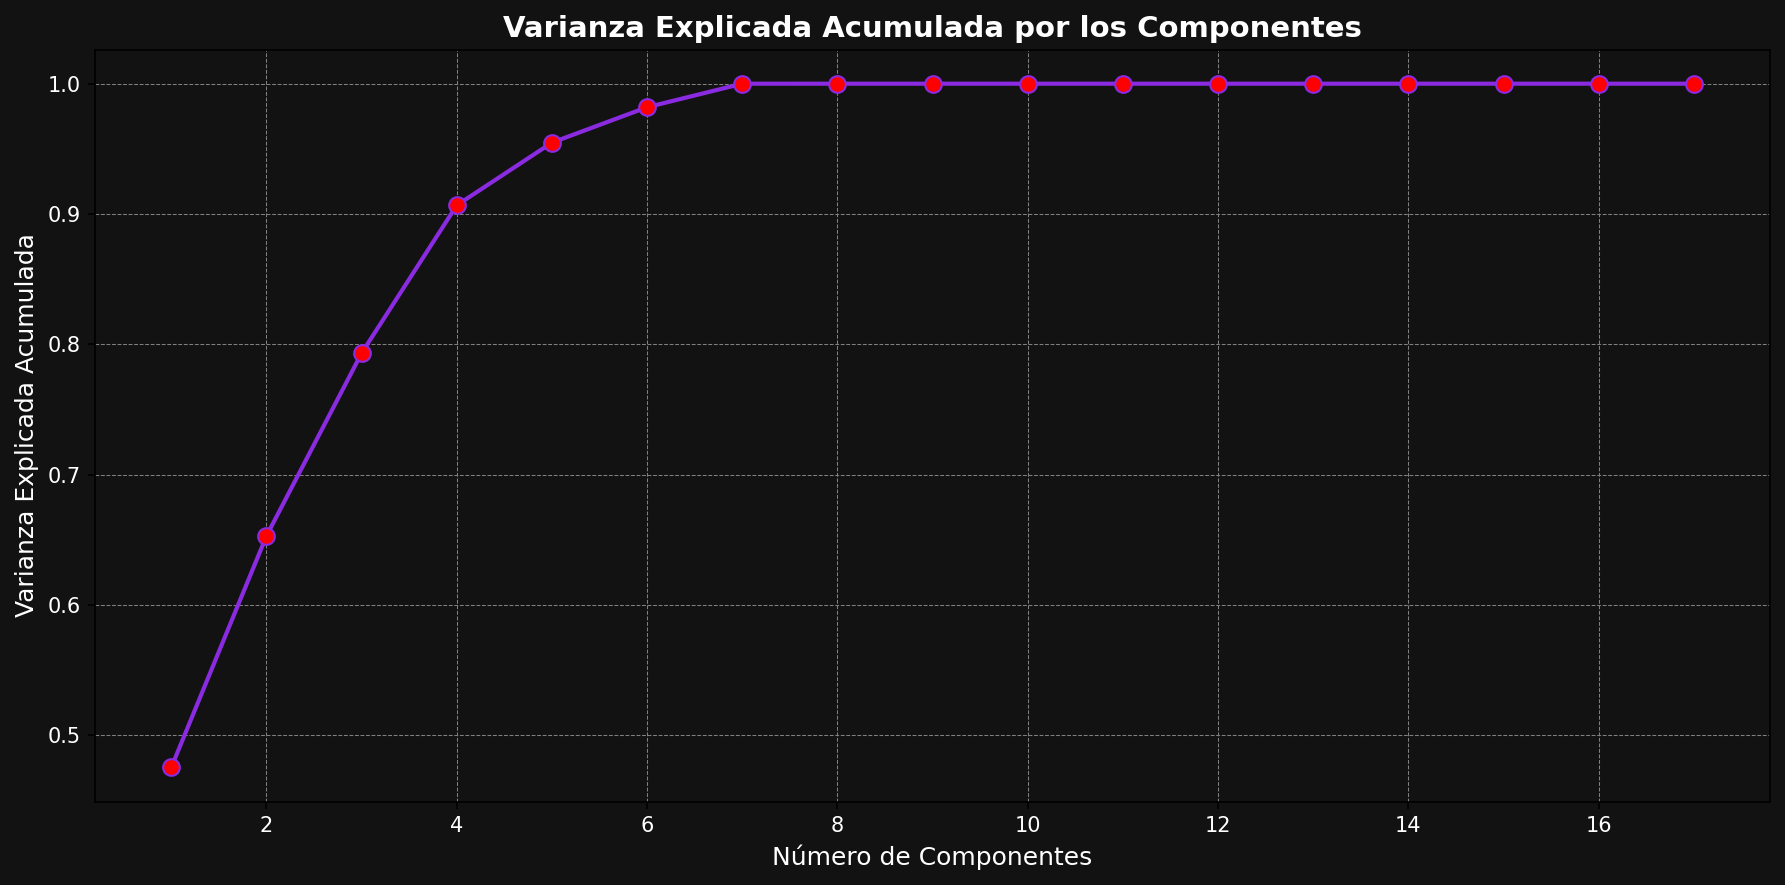

In [6]:
#Visualizacion de la varianza explicada
plt.figure(figsize=(12, 6), dpi=150)
plt.plot(range(1, len(var_explicada) + 1), var_explicada.cumsum(),
         marker="o", linestyle="-", color="#8A2BE2", markerfacecolor="red", markersize=8, linewidth=2)
plt.title("Varianza Explicada Acumulada por los Componentes", fontsize=14, color="white", fontweight="bold")
plt.xlabel("Número de Componentes", fontsize=12, color="white")
plt.ylabel("Varianza Explicada Acumulada", fontsize=12, color="white")
plt.xticks(fontsize=10, color="white")
plt.yticks(fontsize=10, color="white")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.gca().set_facecolor("#121212")
plt.gcf().set_facecolor("#121212")
plt.show()

📌 **Interpretación de la gráfica: Selección del Número Óptimo de Componentes Principales (PCA)**  

Al aplicar **PCA** a nuestros datos, buscamos reducir la cantidad de variables conservando la mayor cantidad de información posible.  
Para esto, analizamos la **varianza explicada acumulada** y encontramos que:  

✅ A partir del **componente 6**, la curva empieza a estabilizarse.  
✅ Los primeros **6 componentes** retienen la mayor parte de la variabilidad en los datos.  
✅ Incluir más componentes solo añadiría complejidad sin un beneficio significativo en la información retenida.  

🔹 Por ello, seleccionamos **6 componentes principales**, logrando un equilibrio entre **reducción de dimensionalidad**  
y **preservación de la información clave** del dataset.  

In [7]:
pca6 = PCA(n_components = 6)
pca6.fit(df)

PCA(n_components=6)

🔍 **Matriz de Correlación entre Variables Originales y Componentes Principales**  

Para entender cómo las variables originales se relacionan con los **Componentes Principales (PCA)**,  
construimos un DataFrame llamado **df_pca6componentes**, el cual contiene las **cargas factoriales**  
de los **6 primeros componentes** obtenidos del análisis de PCA.  

📊 **¿Qué representan estas cargas?**  
✅ Indican **cuánto influye cada variable original** en cada componente principal.  
✅ Valores altos (positivos o negativos) significan una fuerte relación entre la variable y el componente.  
✅ Nos ayudan a interpretar **qué características predominan en cada componente latente**.  

🔹 En resumen, esta matriz nos permite traducir los **componentes principales**,  
que son combinaciones matemáticas de las variables originales, en **factores comprensibles y útiles para el análisis**.  
"""

In [8]:
# Creamos un DataFrame de los componentes
df_pca6componentes = pd.DataFrame(data=pca6.components_,
                                 columns = df.columns.values,
                                 index = ["Componente 1", "Componente 2", "Componente 3", "Componente 4", "Componente 5", "Componente 6"])

In [9]:
df_pca6componentes

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,transacciones.adelanto,transacciones.compras,limite.credito,monto.pagado,pago.minimo,pago.total.prct,tenencia
Componente 1,0.291744,0.000008,0.292490,0.210648,0.081837,0.216248,0.000013,0.000023,0.000008,0.000010,0.000405,0.002341,0.689597,0.487224,0.136254,0.000002,0.000039
Componente 2,-0.300770,-0.000005,0.501524,0.380909,0.120654,-0.204715,0.000037,0.000028,0.000030,-0.000019,-0.000505,0.003520,-0.447094,0.470304,-0.188047,0.000026,0.000003
Componente 3,0.275369,0.000012,-0.096010,-0.077512,-0.018525,0.396795,-0.000030,-0.000028,-0.000017,0.000029,0.000991,-0.000956,-0.507108,0.292246,0.639209,-0.000027,-0.000026
Componente 4,0.054855,0.000010,0.294864,0.186013,0.108868,-0.565114,0.000045,0.000025,0.000038,-0.000032,-0.001164,0.003093,0.090638,-0.363734,0.635382,0.000001,0.000053
Componente 5,0.719933,0.000043,0.288772,0.279678,0.009019,0.139372,-0.000005,0.000021,-0.000011,0.000034,0.000710,0.002234,-0.230880,-0.368635,-0.333735,-0.000057,-0.000067
Componente 6,-0.476541,-0.000014,0.269159,0.302693,-0.033619,0.632894,0.000015,0.000032,-0.000007,0.000021,0.001098,0.000970,0.073590,-0.426177,0.141806,0.000027,-0.000176


In [10]:
print(pca6.components_)

[[ 2.91743550e-01  8.48057087e-06  2.92490440e-01  2.10648351e-01
   8.18365209e-02  2.16248317e-01  1.29742082e-05  2.27287105e-05
   8.46749643e-06  1.02259170e-05  4.04882716e-04  2.34066340e-03
   6.89596929e-01  4.87223673e-01  1.36254497e-01  2.31648511e-06
   3.94234308e-05]
 [-3.00770499e-01 -4.59880627e-06  5.01523648e-01  3.80909326e-01
   1.20654123e-01 -2.04715318e-01  3.70532319e-05  2.84233106e-05
   3.02007822e-05 -1.94250675e-05 -5.05063436e-04  3.51980755e-03
  -4.47094079e-01  4.70304265e-01 -1.88046747e-01  2.55854191e-05
   2.85260328e-06]
 [ 2.75369452e-01  1.19931054e-05 -9.60104160e-02 -7.75121662e-02
  -1.85250909e-02  3.96794994e-01 -3.04785193e-05 -2.81032701e-05
  -1.69811545e-05  2.85945642e-05  9.91411299e-04 -9.55936235e-04
  -5.07108012e-01  2.92246413e-01  6.39208636e-01 -2.71970762e-05
  -2.57352023e-05]
 [ 5.48547226e-02  1.04368988e-05  2.94864118e-01  1.86012539e-01
   1.08868292e-01 -5.65114229e-01  4.52237084e-05  2.45845475e-05
   3.75256805e-05 -

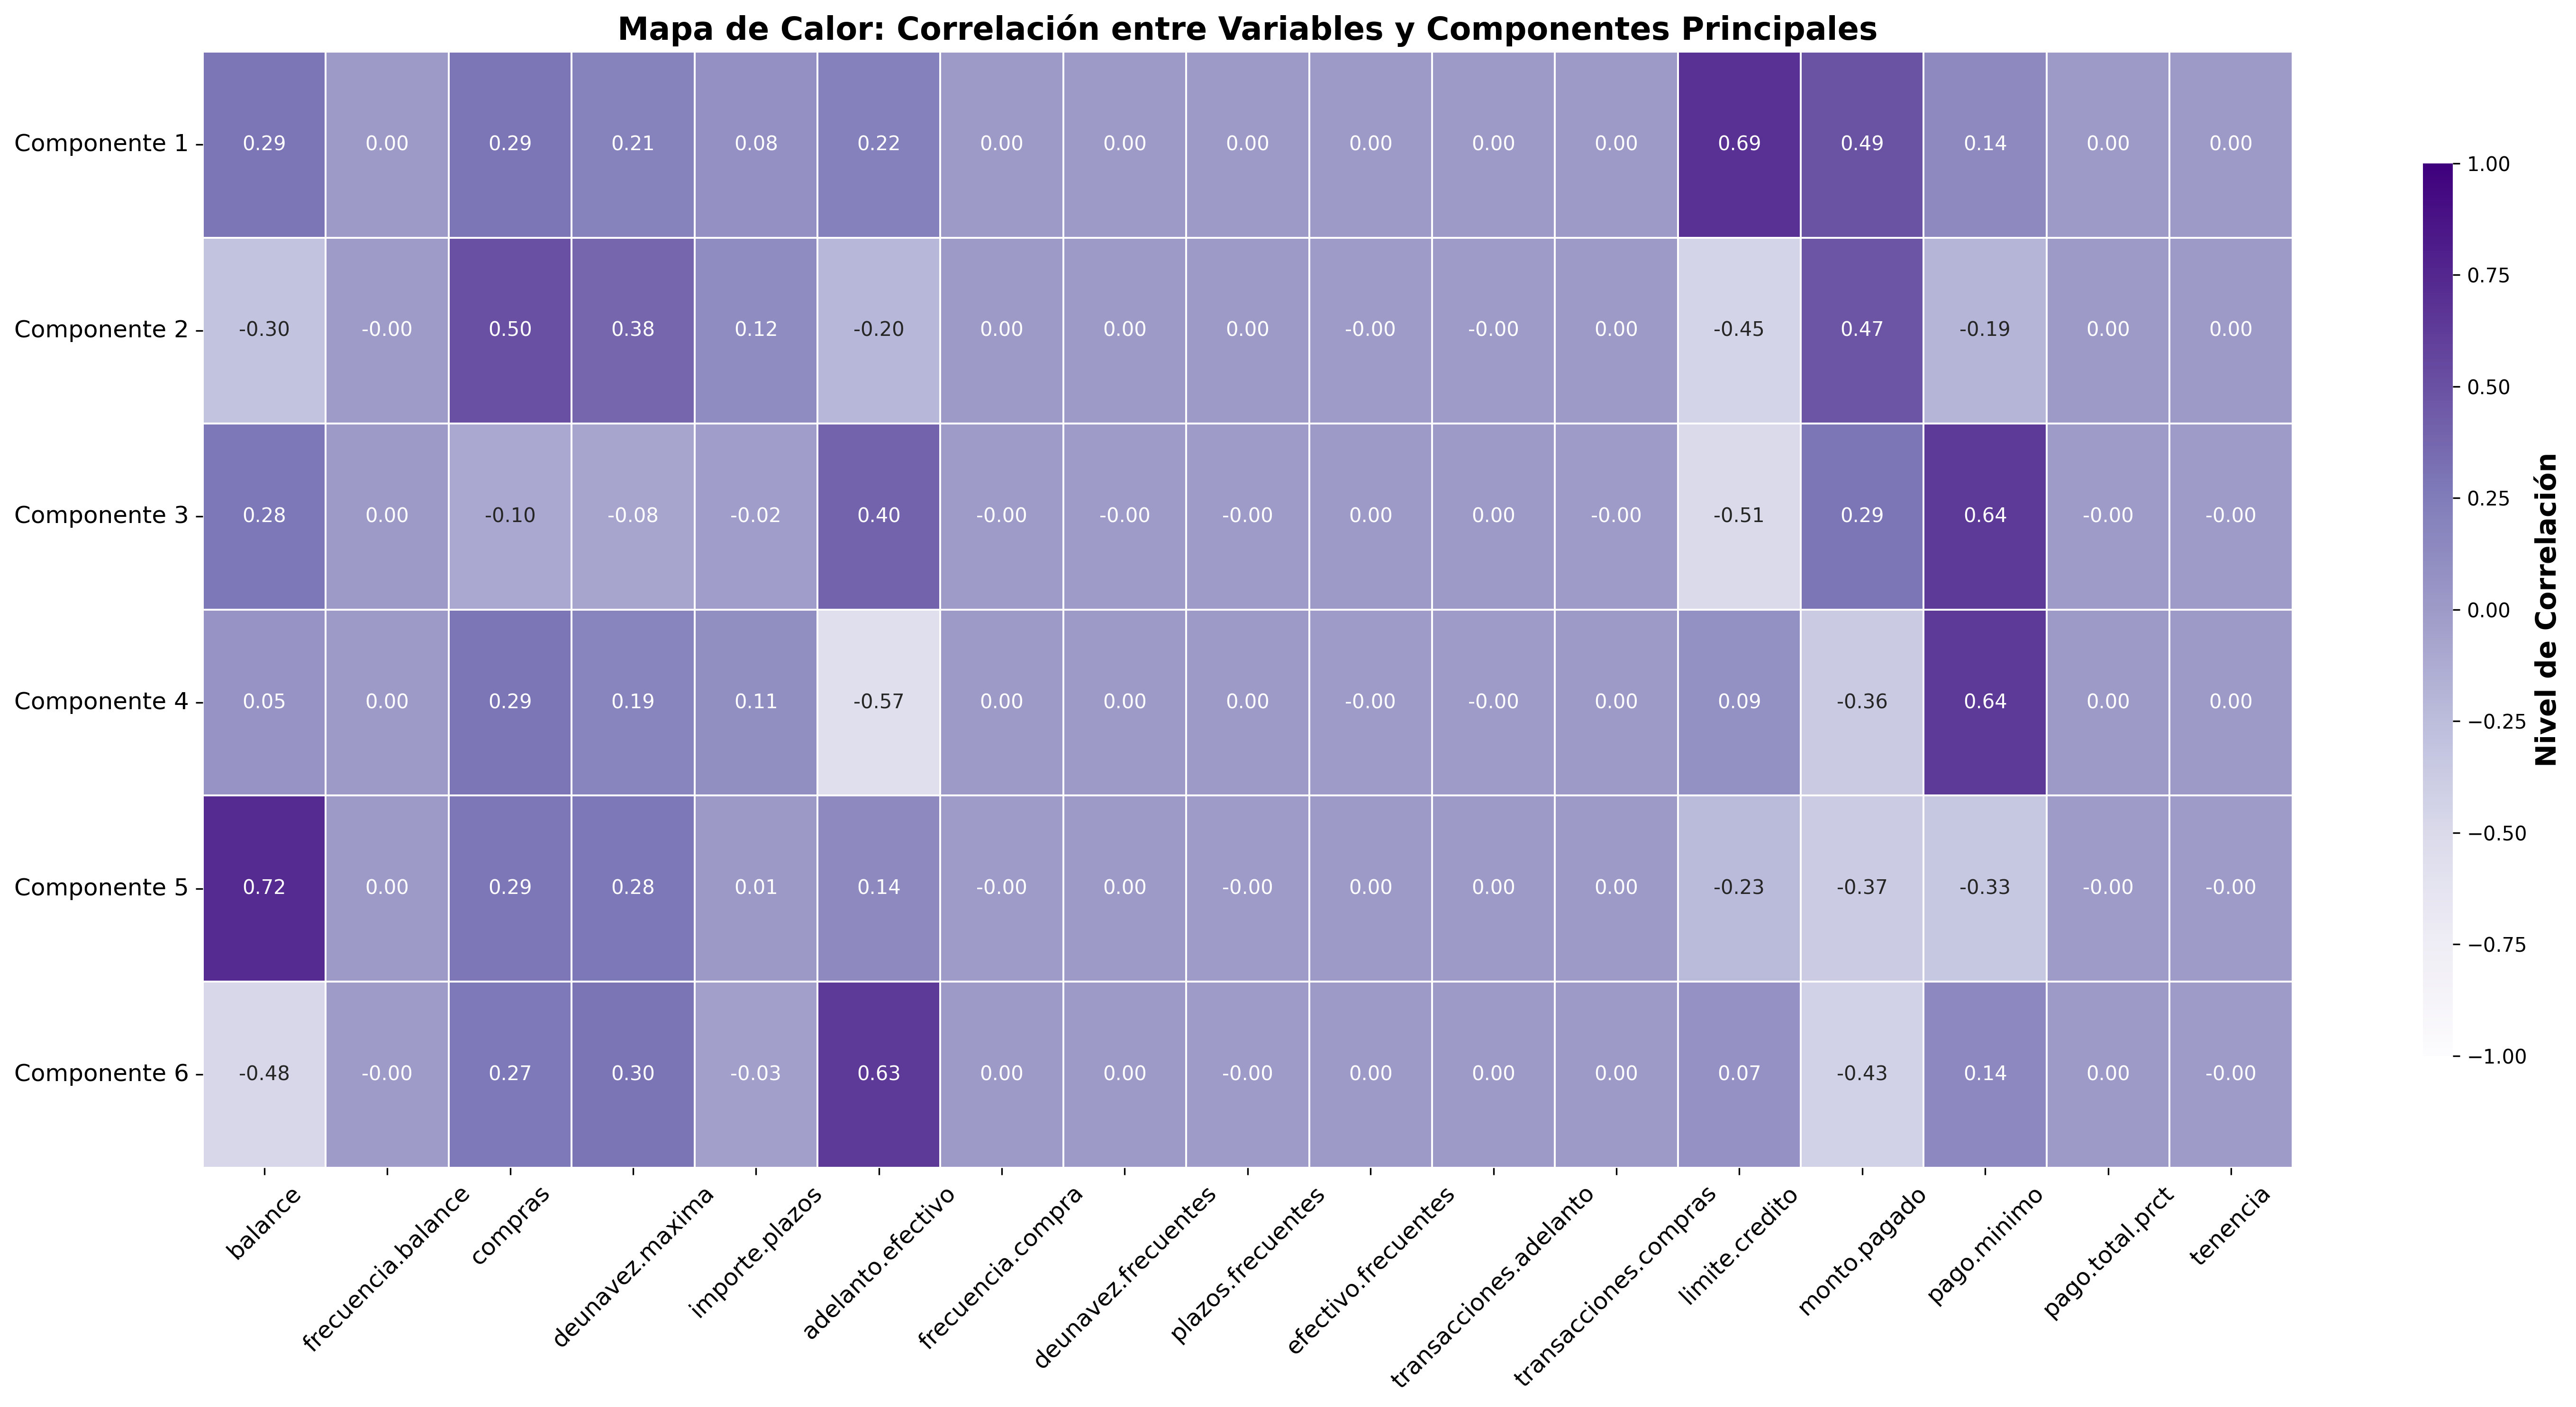

In [11]:
# Hacemos la visualizacion de nuestro mapa de Calor: Ayuda a identificar rápidamente qué variables contribuyen más a cada componente principal, facilitando la
# interpretación de las dimensiones reducidas del PCA.
plt.figure(figsize=(20, 10), dpi=300)
mapa = sns.heatmap(df_pca6componentes,
                   annot=True,
                   cmap="Purples",
                   fmt=".2f",
                   linewidths=0.5,
                   vmin=-1, vmax=1,
                   cbar_kws={"shrink": 0.8, "aspect": 30})
cbar = mapa.collections[0].colorbar
cbar.set_label("Nivel de Correlación", fontsize=14, color="black", fontweight="bold")
cbar.ax.yaxis.set_tick_params(color="black")
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color="black")
plt.title("Mapa de Calor: Correlación entre Variables y Componentes Principales",
          fontsize=16, fontweight='bold', color="black")
plt.xticks(fontsize=12, rotation=45, color="black")
plt.yticks(fontsize=12, rotation=0, color="black")
plt.tight_layout()
plt.show()

🔍 **Interpretación del Mapa de Calor: Correlación entre Variables Originales y Componentes Principales**

El mapa de calor nos permite visualizar la relación entre las variables originales del dataset y los seis primeros
componentes principales obtenidos tras aplicar PCA. Cada celda representa el coeficiente de correlación entre una
variable y un componente, donde los valores más cercanos a 1 o -1 indican una fuerte relación, mientras que valores
cercanos a 0 muestran una baja influencia.

🎯 **Puntos clave en la interpretación:**
- **Colores más oscuros (morado intenso)** ➝ Indican una alta correlación positiva con el componente principal.
- **Colores más claros (dorado claro o blanco)** ➝ Representan baja correlación o valores cercanos a 0.
- **Valores negativos destacados** ➝ Muestran una relación inversa con el componente correspondiente.

📌 **Hallazgos en nuestra gráfica:**
1. **El Componente 5 tiene una fuerte relación con la variable `balance`** (0.72), lo que sugiere que este factor
   está altamente influenciado por el saldo de la tarjeta de crédito.
2. **El Componente 6 está altamente correlacionado con `adelanto.efectivo`** (0.63), lo que indica que este
   componente captura variaciones relacionadas con los adelantos en efectivo.
3. **El Componente 4 muestra una correlación inversa con `importe.plazos` (-0.57)**, lo que implica que este
   factor está relacionado con patrones opuestos a los pagos a plazos.
4. **`frecuencia.balance` parece no tener un impacto significativo en ningún componente**, ya que sus correlaciones
   son cercanas a 0 en todas las dimensiones.

✅ **Conclusión:**  
El PCA nos ha permitido reducir la dimensionalidad del dataset conservando información clave. Este mapa de calor
es fundamental para interpretar qué variables originales están aportando más a la nueva estructura de datos y cómo
se pueden agrupar en factores latentes.



In [12]:
# Ahora transofrmaremos nuestra base de 17 variables a 6 variables latentes
scores_pca6 = pca6.transform(df)
print(scores_pca6)

[[-4.32250297e+03  9.12075900e+02  2.11345568e+02 -1.43620714e+02
  -6.10556423e+01 -9.52898755e+00]
 [ 4.12288176e+03 -2.44037939e+03  2.34315136e+03 -3.93220261e+03
  -5.01156080e+01  1.45029925e+03]
 [ 1.50043702e+03 -2.00332309e+03 -2.09766609e+03  1.07052502e+03
   2.98524756e+02 -3.91001623e+02]
 ...
 [-4.37576493e+03  9.01886777e+02  1.29192870e+02 -1.17222345e+02
   4.42837428e+00  5.36286620e+01]
 [-4.78724798e+03  1.02258485e+03  3.85624860e+02 -2.48557539e+02
   9.42818975e+01  1.91533657e+01]
 [-3.62043944e+03  1.54671969e+03 -3.49301757e-01  3.26062749e+02
   8.10650840e+02  5.82022826e+02]]


📌 **Estandarización de Datos antes del Clustering**

Antes de aplicar el algoritmo de agrupamiento K-Means, es fundamental **escalar los datos** para garantizar que todas
las variables contribuyan equitativamente en la formación de los clústeres. Esto es especialmente importante en nuestro
caso, ya que los componentes principales (variables latentes) pueden tener diferentes escalas y magnitudes.

⚙️ **Proceso de estandarización:**
1. Utilizamos la clase `StandardScaler` de `sklearn.preprocessing`, que transforma los datos para que tengan **media 0 y desviación estándar 1**.
2. Ajustamos (`fit`) el `StandardScaler` a nuestros datos latentes obtenidos con PCA.
3. Aplicamos la transformación (`transform`) para obtener datos estandarizados, listos para K-Means.

🎯 **¿Por qué es importante este paso?**
- K-Means utiliza la distancia euclidiana para calcular la similitud entre puntos, por lo que **las diferencias en escala podrían sesgar los resultados**.
- La estandarización permite que cada componente tenga la misma influencia en la formación de los clústeres.
- Evita que variables con valores más grandes (como `balance`) dominen sobre otras con valores más pequeños.

✅ **Conclusión:**  
Al escalar las variables latentes obtenidas con PCA, garantizamos que el proceso de clustering sea más preciso y los grupos formados reflejen patrones significativos en los datos.

In [13]:
#Estandarizamos
estandarizar = StandardScaler()
pca6_std = estandarizar.fit_transform(scores_pca6)
print(pca6_std)

[[-9.45689228e-01  3.26484012e-01  8.51306525e-02 -6.43155735e-02
  -4.20152673e-02 -8.72165078e-03]
 [ 9.02015544e-01 -8.73551046e-01  9.43828660e-01 -1.76090105e+00
  -3.44869136e-02  1.32742367e+00]
 [ 3.28269788e-01 -7.17103652e-01 -8.44946432e-01  4.79397636e-01
   2.05428965e-01 -3.57874285e-01]
 ...
 [-9.57342029e-01  3.22836744e-01  5.20392903e-02 -5.24939765e-02
   3.04737321e-03  4.90850113e-02]
 [-1.04736743e+00  3.66041473e-01  1.55330894e-01 -1.11307904e-01
   6.48798206e-02  1.75306103e-02]
 [-7.92089817e-01  5.53659240e-01 -1.40699835e-04  1.46015934e-01
   5.57847079e-01  5.32711351e-01]]


In [14]:
# Determinando K con el Método del Codo - WCSS
wcss = []
for i in range(1,11):
    kmediaspca6 = KMeans(n_clusters = i, init = "k-means++", random_state = 99)
    kmediaspca6.fit(pca6_std)
    wcss.append(kmediaspca6.inertia_)

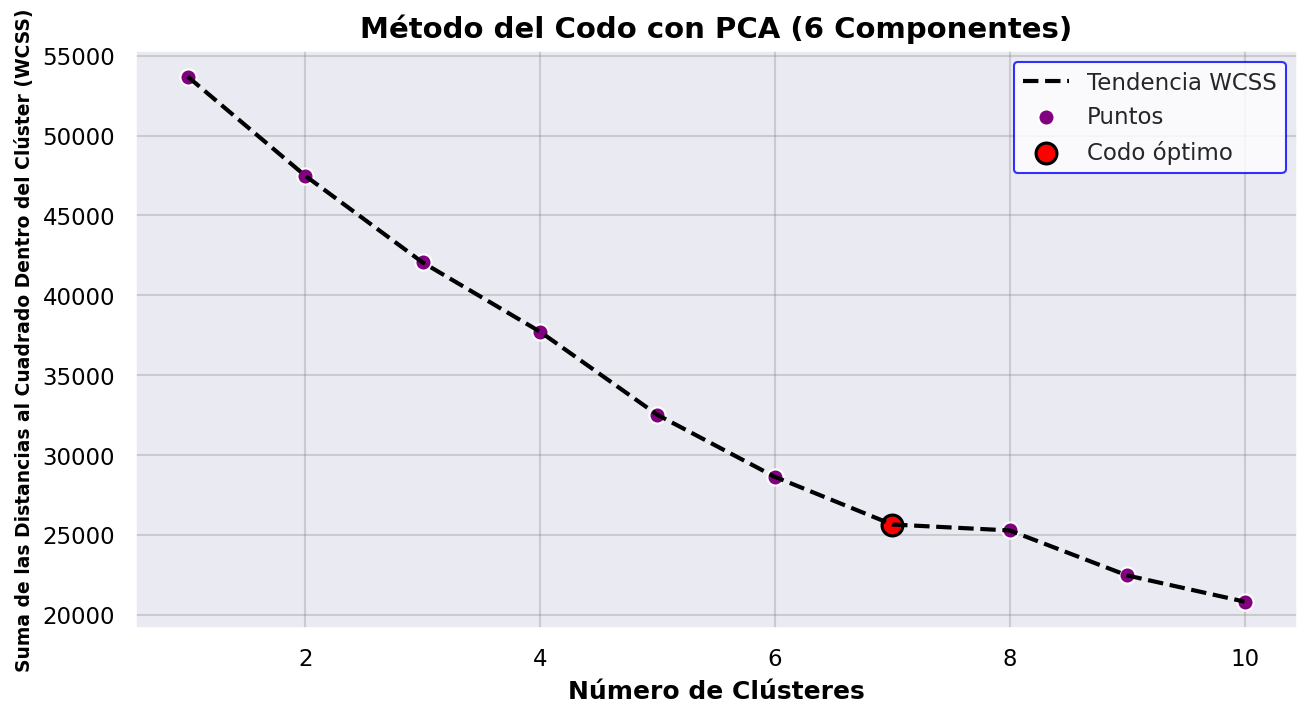

In [15]:
#Visualizacion de nuestra grafica del codo
sns.set(style="darkgrid", rc={"grid.color": "gray", "grid.alpha": 0.3})
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(range(1, 11), wcss, linestyle="--", color="black", linewidth=2, label="Tendencia WCSS")
plt.scatter(range(1, 11), wcss, color="purple", s=60, edgecolor="white", label="Puntos")
best_k = 7
plt.scatter(best_k, wcss[best_k - 1], color="red", s=100, edgecolor="black", linewidth=1.5, label="Codo óptimo")
plt.xlabel("Número de Clústeres", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Suma de las Distancias al Cuadrado Dentro del Clúster (WCSS)", fontsize=9, fontweight="bold", color="black")
plt.title("Método del Codo con PCA (6 Componentes)", fontsize=14, fontweight="bold", color="black")
plt.xticks(fontsize=11, color="black")
plt.yticks(fontsize=11, color="black")
plt.legend(fontsize=11, facecolor="white", edgecolor="blue")
plt.show()

🔹 **Implementación de K-Means Clustering**

El número óptimo de clústeres se ha determinado como **7** a partir del **Método del Codo**.
Este punto representa un equilibrio entre la **cohesión interna** de los grupos y la **separación entre ellos**.

📌 **¿Por qué k=7?**  
El análisis del gráfico muestra que en k=7, la disminución de la **Suma de las Distancias al Cuadrado (WCSS)**
se vuelve menos pronunciada. Esto significa que agregar más clústeres no mejorará significativamente la segmentación,
pero sí podría aumentar la complejidad del modelo sin una ganancia sustancial.

⚡ **¿Qué lograremos con K-Means?**  
K-Means nos permitirá **agrupar** los datos en 7 segmentos distintos, donde cada clúster contiene
observaciones con características similares. Esto facilita la interpretación de los patrones ocultos en los datos y
puede ser útil para estrategias de negocio, análisis de clientes o estudios de comportamiento.

✅ **Conclusión:**  
Aplicar K-Means con k=7 nos permite obtener una segmentación óptima y significativa,
maximizando la utilidad del análisis sin sobreajustar el modelo. 🚀

In [16]:
#Creacion de nuestra variable y entrenamiento del modelo
cluster_k7_pca6 = KMeans(n_clusters = 7, init = "k-means++", random_state = 99)
cluster_k7_pca6.fit(pca6_std)

KMeans(n_clusters=7, random_state=99)

In [17]:
# Concatenemos un df con las variables originales y las latentes
df_k7_pca6 = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca6)], axis = 1)
df_k7_pca6

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,monto.pagado,pago.minimo,pago.total.prct,tenencia,0,1,2,3,4,5
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,-4322.502965,912.075900,211.345568,-143.620714,-61.055642,-9.528988
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,4122.881755,-2440.379395,2343.151356,-3932.202605,-50.115608,1450.299249
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,1500.437024,-2003.323087,-2097.666094,1070.525020,298.524756,-391.001623
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.000000,0.000000,12,1279.846965,-1330.413945,-2952.847025,1085.486488,581.994140,725.259494
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,-3739.093063,748.091636,538.547761,-220.143831,221.902588,-566.473886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,325.594462,48.886365,0.500000,6,-4204.883548,1112.855914,163.758991,-167.878712,-27.084979,-23.120095
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,275.861322,0.000000,0.000000,6,-4235.167897,1106.984318,114.395238,-177.776138,3.505129,-2.329043
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,81.270775,82.418369,0.250000,6,-4375.764932,901.886777,129.192870,-117.222345,4.428374,53.628662
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,52.549959,55.755628,0.250000,6,-4787.247978,1022.584853,385.624860,-248.557539,94.281898,19.153366


In [18]:
#Agregamos nombres a las variables latentes
df_k7_pca6.columns.values[-6:] = ["ActividadFinanciera", "GestionCompras", "ResponsabilidadPago", "AversionEfectivo", "ConservacionSaldo", "CautelaCrediticia"]
df_k7_pca6

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,monto.pagado,pago.minimo,pago.total.prct,tenencia,ActividadFinanciera,GestionCompras,ResponsabilidadPago,AversionEfectivo,ConservacionSaldo,CautelaCrediticia
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,-4322.502965,912.075900,211.345568,-143.620714,-61.055642,-9.528988
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,4122.881755,-2440.379395,2343.151356,-3932.202605,-50.115608,1450.299249
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,1500.437024,-2003.323087,-2097.666094,1070.525020,298.524756,-391.001623
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.000000,0.000000,12,1279.846965,-1330.413945,-2952.847025,1085.486488,581.994140,725.259494
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,-3739.093063,748.091636,538.547761,-220.143831,221.902588,-566.473886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,325.594462,48.886365,0.500000,6,-4204.883548,1112.855914,163.758991,-167.878712,-27.084979,-23.120095
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,275.861322,0.000000,0.000000,6,-4235.167897,1106.984318,114.395238,-177.776138,3.505129,-2.329043
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,81.270775,82.418369,0.250000,6,-4375.764932,901.886777,129.192870,-117.222345,4.428374,53.628662
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,52.549959,55.755628,0.250000,6,-4787.247978,1022.584853,385.624860,-248.557539,94.281898,19.153366


In [19]:
# Agreguemos la columna con los clusters de cluster_k7_pca6
df_k7_pca6['Clusters7'] = cluster_k7_pca6.labels_
df_k7_pca6

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,pago.minimo,pago.total.prct,tenencia,ActividadFinanciera,GestionCompras,ResponsabilidadPago,AversionEfectivo,ConservacionSaldo,CautelaCrediticia,Clusters7
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,-4322.502965,912.075900,211.345568,-143.620714,-61.055642,-9.528988,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,4122.881755,-2440.379395,2343.151356,-3932.202605,-50.115608,1450.299249,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,1500.437024,-2003.323087,-2097.666094,1070.525020,298.524756,-391.001623,4
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.000000,12,1279.846965,-1330.413945,-2952.847025,1085.486488,581.994140,725.259494,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,-3739.093063,748.091636,538.547761,-220.143831,221.902588,-566.473886,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,48.886365,0.500000,6,-4204.883548,1112.855914,163.758991,-167.878712,-27.084979,-23.120095,5
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.000000,0.000000,6,-4235.167897,1106.984318,114.395238,-177.776138,3.505129,-2.329043,5
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,82.418369,0.250000,6,-4375.764932,901.886777,129.192870,-117.222345,4.428374,53.628662,5
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,55.755628,0.250000,6,-4787.247978,1022.584853,385.624860,-248.557539,94.281898,19.153366,5


🔹 **Cálculo del Promedio de las Variables por Clúster**  

Una vez aplicamos **K-Means Clustering**, es importante analizar las características de cada grupo.  
Para ello, calculamos el **promedio de las variables dentro de cada clúster**, lo que nos permite entender
cómo se comportan los diferentes segmentos de datos.  

📌 **¿Por qué calcular las medias agrupadas?**  
Cuando agrupamos datos en clústeres, queremos saber qué los hace diferentes entre sí.  
Al calcular la **media de cada variable por clúster**, podemos:  

✅ **Identificar patrones** → Ver qué características predominan en cada grupo.  
✅ **Interpretar los segmentos** → Comprender el perfil de cada clúster en base a las variables originales.  
✅ **Tomar decisiones estratégicas** → Aplicar estos hallazgos en modelos predictivos, estrategias de negocio o análisis financiero.  

⚡ **Ejemplo de aplicación**  
Si estamos analizando clientes de tarjetas de crédito, las medias agrupadas nos dirán si un grupo gasta más,  
paga regularmente o tiene altos niveles de adelantos en efectivo.  

✅ **Conclusión:**  
Este análisis nos proporciona una **visión resumida** y fácil de interpretar de los grupos encontrados,  
permitiendo una toma de decisiones basada en datos. 🚀

In [20]:
medias_agrupadas = df_k7_pca6.groupby(["Clusters7"]).mean()
medias_agrupadas

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,monto.pagado,pago.minimo,pago.total.prct,tenencia,ActividadFinanciera,GestionCompras,ResponsabilidadPago,AversionEfectivo,ConservacionSaldo,CautelaCrediticia
Clusters7,,,,,,,,,,,,,,,,,,,,,
0,3223.510348,0.789683,1674.414355,828.431774,846.100860,3039.541905,0.391464,0.185138,0.319113,0.217416,...,11517.490294,1486.690480,0.169034,11.844086,9034.984356,2113.048604,2278.088198,-3538.455546,-3072.889257,-3009.550336
1,6061.116710,0.999094,1333.760953,777.280000,556.563812,1815.187263,0.462331,0.250767,0.336518,0.272381,...,2043.477603,2136.233251,0.000227,11.856436,4913.036199,-3277.637278,279.399698,1023.266305,1967.599771,-1106.900074
2,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,...,1357.092339,27995.061876,0.000000,11.916667,4199.302785,-6252.934362,18035.424170,17472.549398,-7134.769495,2559.431408
3,3741.429208,0.916089,666.833837,424.824245,242.009592,6923.636494,0.297441,0.144726,0.200171,0.458502,...,4000.166405,1326.045752,0.049221,10.965306,4830.011783,-2373.367921,2597.427486,-3653.002640,619.126590,1894.234240
4,681.080773,0.850867,1384.547505,835.393746,549.672696,270.061330,0.627000,0.346125,0.432756,0.049855,...,1671.503290,288.875479,0.296085,11.825896,2265.072463,-904.918778,-2865.582667,543.478159,-1223.401477,370.999243
5,894.999920,0.864829,653.856774,345.567159,308.597316,492.219724,0.470191,0.153722,0.359973,0.110853,...,1030.974113,555.135880,0.141043,11.412398,-2293.741773,681.990697,360.329758,-34.226289,116.880045,-49.366064
6,3511.058726,0.985114,15767.261250,12344.061375,3423.199875,459.487431,0.914375,0.830549,0.673731,0.044792,...,13907.198274,1841.724327,0.458321,11.950000,17972.594638,14443.764386,-1093.639417,4059.356486,2606.700360,1598.458522


In [21]:
# Hagamos un .iloc para seleccionar las variables que nos interesan (Variables Latentes)
medias_agrupadas.iloc[:, -6:]

,ActividadFinanciera,GestionCompras,ResponsabilidadPago,AversionEfectivo,ConservacionSaldo,CautelaCrediticia
Clusters7,,,,,,
0,9034.984356,2113.048604,2278.088198,-3538.455546,-3072.889257,-3009.550336
1,4913.036199,-3277.637278,279.399698,1023.266305,1967.599771,-1106.900074
2,4199.302785,-6252.934362,18035.424170,17472.549398,-7134.769495,2559.431408
3,4830.011783,-2373.367921,2597.427486,-3653.002640,619.126590,1894.234240
4,2265.072463,-904.918778,-2865.582667,543.478159,-1223.401477,370.999243
5,-2293.741773,681.990697,360.329758,-34.226289,116.880045,-49.366064
6,17972.594638,14443.764386,-1093.639417,4059.356486,2606.700360,1598.458522


📊 **Interpretación de los Clústeres en función de sus características**  

Tras aplicar **K-Means con k=7**, hemos calculado el promedio de las variables dentro de cada clúster.  
Esto nos ayuda a **identificar el perfil y comportamiento predominante de cada grupo**.  

🔹 **Explicación de las Variables**  
- **Actividad Financiera**: Nivel de movimientos financieros generales.  
- **Gestión de Compras**: Frecuencia e intensidad de compras realizadas.  
- **Responsabilidad de Pago**: Capacidad de cumplir con pagos a tiempo.  
- **Aversión al Efectivo**: Preferencia por métodos digitales en lugar de efectivo.  
- **Conservación del Saldo**: Tendencia a mantener dinero en la cuenta sin gastarlo.  
- **Cautela Crediticia**: Uso prudente del crédito, evitando deudas elevadas.  

📌 **Análisis de los Clústeres**  

**Clúster 0** → **Alta Actividad Financiera, Bajo Uso de Efectivo**  
   - Clientes con **altos movimientos financieros** y **gastos moderados**.  
   - Prefieren no usar efectivo (**aversión negativa al efectivo**).  
   - Baja tendencia a conservar saldo y cautela crediticia.  

**Clúster 1** → **Actividad Financiera Moderada con Bajo Gasto**  
   - Movimiento financiero **medio**, pero con **baja gestión de compras**.  
   - Baja responsabilidad de pago, pero **conservan saldo**.  
   - Son **precavidos con el crédito**.  

**Clúster 2** → **Usuarios de Alto Crédito y Compras Elevadas**  
   - **Alta responsabilidad de pago** y **alta aversión al efectivo** (usan tarjetas y pagos digitales).  
   - Prefieren **mantenerse al día con pagos**.  
   - Tienden a no conservar saldo disponible.  

**Clúster 3** → **Clientes con Compras Elevadas y Moderada Actividad Financiera**  
   - Alta actividad financiera con **buen nivel de compras**.  
   - Uso bajo de efectivo, pero **conservan saldo disponible**.  
   - Suelen ser **más confiados en el uso del crédito**.  

**Clúster 4** → **Baja Actividad Financiera y Compras Discretas**  
   - Movimiento financiero **bajo**.  
   - Compras moderadas y **responsabilidad de pago negativa**.  
   - Prefieren **mantener saldo sin muchos movimientos**.  

**Clúster 5** → **Usuarios de Bajo Movimiento Financiero**  
   - **Actividad financiera negativa** (puede ser inactividad o retiro de dinero).  
   - Baja gestión de compras y baja responsabilidad de pago.  
   - Mantienen saldo estable y son **cautelosos con el crédito**.  

**Clúster 6** → **Clientes con Alta Actividad Financiera y Gestión de Compras Elevada**  
   - **Movimiento financiero muy alto**.  
   - Compras **elevadas**, pero con baja responsabilidad de pago.  
   - Prefieren **mantener saldo** y mostrar cautela crediticia.  

✅ **Conclusión:**  
Los datos reflejan **diferentes tipos de comportamiento financiero** entre los clientes.  
Esta información es clave para segmentación de mercado, estrategias de crédito y toma de decisiones financieras. 🚀

In [22]:
import plotly.express as px # Libreria para graficas 3D e interactivas
# En este caso usaremos un gráfico 3D para mejor visualizacion de nuestros clusters
fig = px.scatter_3d(df_k7_pca6,
                     x='ActividadFinanciera',
                     y='GestionCompras',
                     z='ResponsabilidadPago',
                     color=df_k7_pca6['Clusters7'].astype(str),
                     title='Clusters en 3D - Segmentación Financiera',
                     labels={'Clusters7': 'Cluster'},
                     opacity=0.6,
                     symbol=df_k7_pca6['Clusters7'].astype(str),
                     hover_data=df_k7_pca6.columns
                    )
fig.update_layout(scene=dict(
                    xaxis_title='Actividad Financiera',
                    yaxis_title='Gestión de Compras',
                    zaxis_title='Responsabilidad de Pago'
                ))
fig.show()


💳 **Transformando Datos en Conocimiento**  
En este proyecto, hemos explorado una base de datos de tarjetas de crédito aplicando **Análisis de Componentes Principales (PCA)** y **Clustering con K-Means**. A través de este enfoque, logramos **reducir la dimensionalidad** de nuestros datos sin perder información clave, facilitando la interpretación y optimizando el análisis de patrones financieros.  

📊 **PCA: Encontrando la Esencia de los Datos**  
Gracias a PCA, identificamos que **6 componentes principales** explican la mayor parte de la variabilidad de nuestros datos. Esto nos permitió generar nuevas variables latentes que capturan comportamientos financieros relevantes, como la **actividad financiera, la gestión de compras y la responsabilidad de pago**.  

🔎 **K-Means: Agrupando Perfiles Financieros**  
Al aplicar K-Means con **7 clusters óptimos**, segmentamos a los clientes según sus hábitos de gasto, niveles de pago y manejo del crédito. Esta segmentación no solo ayuda a entender diferentes **perfiles financieros**, sino que también puede ser utilizada por instituciones para **tomar mejores decisiones estratégicas**, como personalizar ofertas, optimizar riesgos y mejorar la experiencia del usuario.  

🎨 **Visualización y Análisis Interpretativo**  
Utilizamos gráficos avanzados, incluyendo la **gráfica del codo, mapas de calor y visualizaciones 3D**, lo que nos permitió **interpretar los resultados de manera intuitiva y visualmente atractiva**.  

🚀 **Reflexión Final**  
Este análisis nos demuestra el **poder de la estadística y la ciencia de datos** en la toma de decisiones financieras. A través de técnicas como PCA y K-Means, podemos transformar grandes volúmenes de datos en **información valiosa y procesable**, contribuyendo a la innovación en la industria bancaria y financiera.  

  